In [1]:
import pandas as pd
df = pd.read_csv('music.csv')
df

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz
5,30,1,Jazz
6,31,1,Classical
7,33,1,Classical
8,37,1,Classical
9,20,0,Dance


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     18 non-null     int64 
 1   gender  18 non-null     int64 
 2   genre   18 non-null     object
dtypes: int64(2), object(1)
memory usage: 560.0+ bytes


In [3]:
df.shape

(18, 3)

In [4]:
df.isnull().sum()

,0
age,0
gender,0
genre,0


In [6]:
df.duplicated().sum()

0

In [8]:
#Spliting the dataset
Feature = df.drop(columns=['genre'])
Feature

,age,gender
0,20,1
1,23,1
2,25,1
3,26,1
4,29,1
5,30,1
6,31,1
7,33,1
8,37,1
9,20,0


In [10]:
Target = df['genre']
Target

,genre
0,HipHop
1,HipHop
2,HipHop
3,Jazz
4,Jazz
5,Jazz
6,Classical
7,Classical
8,Classical
9,Dance


In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
model = DecisionTreeClassifier()
model.fit(Feature,Target)

DecisionTreeClassifier()

In [14]:
model.predict([[40,1], [25,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Classical', 'Dance'], dtype=object)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
#calculating accuracy of the model
train_test_split(Feature, Target, test_size = 0.2)

[    age  gender
 10   21       0
 12   26       0
 8    37       1
 0    20       1
 17   35       0
 7    33       1
 13   27       0
 4    29       1
 15   31       0
 16   34       0
 3    26       1
 2    25       1
 11   25       0
 5    30       1,
     age  gender
 14   30       0
 1    23       1
 9    20       0
 6    31       1,
 10        Dance
 12     Acoustic
 8     Classical
 0        HipHop
 17    Classical
 7     Classical
 13     Acoustic
 4          Jazz
 15    Classical
 16    Classical
 3          Jazz
 2        HipHop
 11        Dance
 5          Jazz
 Name: genre, dtype: object,
 14     Acoustic
 1        HipHop
 9         Dance
 6     Classical
 Name: genre, dtype: object]

In [17]:
feature_train, feature_test, target_train, target_test = train_test_split(Feature, Target, test_size = 0.2)

In [18]:
model.fit(feature_train, target_train)
prediction = model.predict(feature_test)

In [19]:
from sklearn.metrics import accuracy_score

In [21]:
score = accuracy_score(target_test, prediction)
score

1.0

In [23]:
pip install joblib

In [24]:
import joblib

In [25]:
joblib.dump(model, 'music-recommender.joblib')

['music-recommender.joblib']

In [26]:
model = joblib.load('music-recommender.joblib')
prediction = model.predict([[40,1]])
prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Classical'], dtype=object)

In [28]:
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text

[Text(0.625, 0.875, 'age <= 30.5\ngini = 0.755\nsamples = 14\nvalue = [3, 5, 2, 3, 1]\nclass = Classical'),
 Text(0.5, 0.625, 'age <= 25.5\ngini = 0.716\nsamples = 9\nvalue = [3, 0, 2, 3, 1]\nclass = Acoustic'),
 Text(0.5625, 0.75, 'True  '),
 Text(0.25, 0.375, 'gender <= 0.5\ngini = 0.48\nsamples = 5\nvalue = [0, 0, 2, 3, 0]\nclass = HipHop'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2, 0, 0]\nclass = Dance'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 3, 0]\nclass = HipHop'),
 Text(0.75, 0.375, 'gender <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 0, 0, 0, 1]\nclass = Acoustic'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0, 0, 0]\nclass = Acoustic'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 1]\nclass = Jazz'),
 Text(0.75, 0.625, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0, 0, 0]\nclass = Classical'),
 Text(0.6875, 0.75, '  False')]

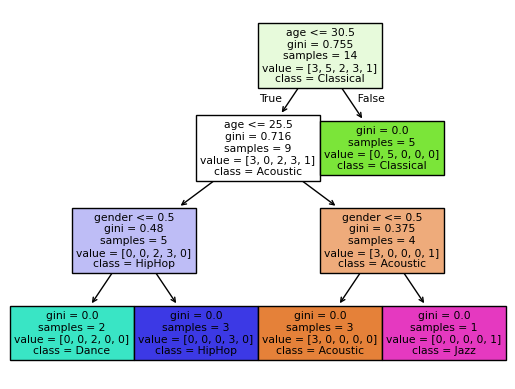

In [29]:
tree.plot_tree(model, feature_names=['age', 'gender'], class_names=sorted(Target.unique()), filled=True)